Goldstein finished, 1 disconnected regions
Aligned by constant offset c = -1.0000 rad
RMSE = 4.9473e+00 rad,  MAE = 3.0062e+00 rad,  Max|err| = 1.5850e+01 rad


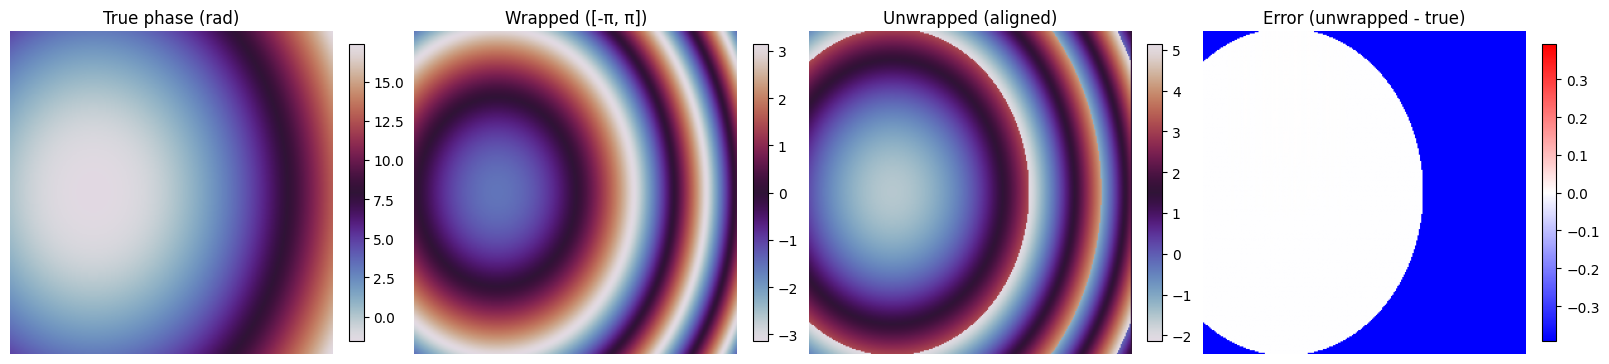

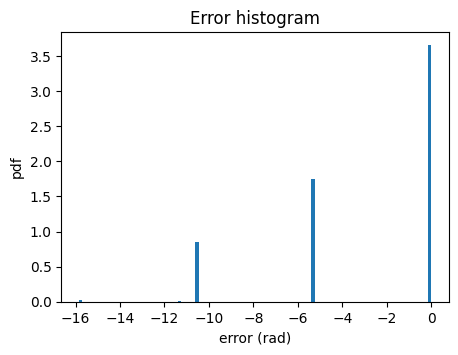

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from goldstein_wrapper import goldstein_unwrap  # uses your DLL
np.set_printoptions(precision=4, suppress=True)

# ---------- helpers ----------
def wrap_to_pi(x):
    return (x + np.pi) % (2*np.pi) - np.pi

def align_offset(unwrapped, phi_true):
    """
    Align unwrapped to phi_true by removing the best constant 2π*k offset.
    """
    diff = unwrapped - phi_true
    # bring residual into [-pi, pi] so the median is a good constant estimator
    diff_wrapped = wrap_to_pi(diff)
    c = np.median(diff_wrapped)  # robust constant
    return unwrapped - c, c

def metrics(err):
    rmse = np.sqrt(np.mean(err**2))
    mae = np.mean(np.abs(err))
    mxe = np.max(np.abs(err))
    return rmse, mae, mxe

# ---------- pick a test phase ----------
ysize, xsize = 256, 256
yy, xx = np.mgrid[0:ysize, 0:xsize]


phi_true = 0.0004*((xx - xsize/2)**2 + 0.7*(yy - ysize/2)**2) + 0.05*(xx - xsize/2)



# ---------- wrap + unwrap ----------
wrapped = wrap_to_pi(phi_true)
unwrapped = goldstein_unwrap(wrapped)  # DLL call

# align by constant offset (unwrapped is defined up to 2πk)
unwrapped_aligned, c = align_offset(unwrapped, phi_true)
err = unwrapped_aligned - phi_true
rmse, mae, mxe = metrics(err)

print(f"Aligned by constant offset c = {c:.4f} rad")
print(f"RMSE = {rmse:.4e} rad,  MAE = {mae:.4e} rad,  Max|err| = {mxe:.4e} rad")

# ---------- plots ----------
fig, axs = plt.subplots(1, 4, figsize=(16, 4), constrained_layout=True)
im0 = axs[0].imshow(phi_true, cmap="twilight", origin="lower")
axs[0].set_title("True phase (rad)"); plt.colorbar(im0, ax=axs[0], fraction=0.046)

im1 = axs[1].imshow(wrapped, cmap="twilight", origin="lower", vmin=-np.pi, vmax=np.pi)
axs[1].set_title("Wrapped ([-π, π])"); plt.colorbar(im1, ax=axs[1], fraction=0.046)

im2 = axs[2].imshow(unwrapped_aligned, cmap="twilight", origin="lower")
axs[2].set_title("Unwrapped (aligned)"); plt.colorbar(im2, ax=axs[2], fraction=0.046)

im3 = axs[3].imshow(err, cmap="bwr", origin="lower", vmin=-np.pi/8, vmax=np.pi/8)
axs[3].set_title("Error (unwrapped - true)"); plt.colorbar(im3, ax=axs[3], fraction=0.046)
for ax in axs: ax.axis("off")
plt.show()

# error histogram
plt.figure(figsize=(5,3.5))
plt.hist(err.ravel(), bins=100, density=True)
plt.title("Error histogram")
plt.xlabel("error (rad)"); plt.ylabel("pdf")
plt.show()


In [3]:
import pefile

dll_path = r"c:\Users\oheymans\odt-thesis\src\Goldstein\qgpu.dll"
pe = pefile.PE(dll_path)

print("Dependencies for qgpu.dll:")
for entry in pe.DIRECTORY_ENTRY_IMPORT:
    print("-", entry.dll.decode())


Dependencies for qgpu.dll:
- libgomp-1.dll
- KERNEL32.dll
- msvcrt.dll
